### What is Linear Regression?
It is a relationship between 2 variables x and y where 
x = input or independent variables
y = output or dependent value
This relationship is in the form of a straight line that best tries to fit each variable.

Mathematically it can be defined as 
y = mx + c where x and y are as defined above, 
m = slope or coefficient of regression
c = constant

General view of a straight line : y = mx + c

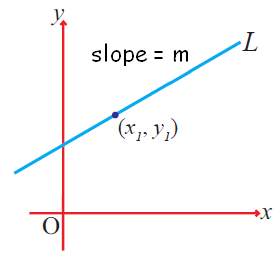



### Best fit line
Let us see a real world graphical representation of Linear Regression. For this we are using [SARS 2003 dataset](https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset) provided by Kaggle. 

Here, we are showing the data in the form of a scatter plot where the relationship between x and y variables is shown. To get better understanding of the relationship, we draw a line called as - best fit line.
It is a line that is drawn through the scatter plot points. The idea of this line is to best fit all the points. 

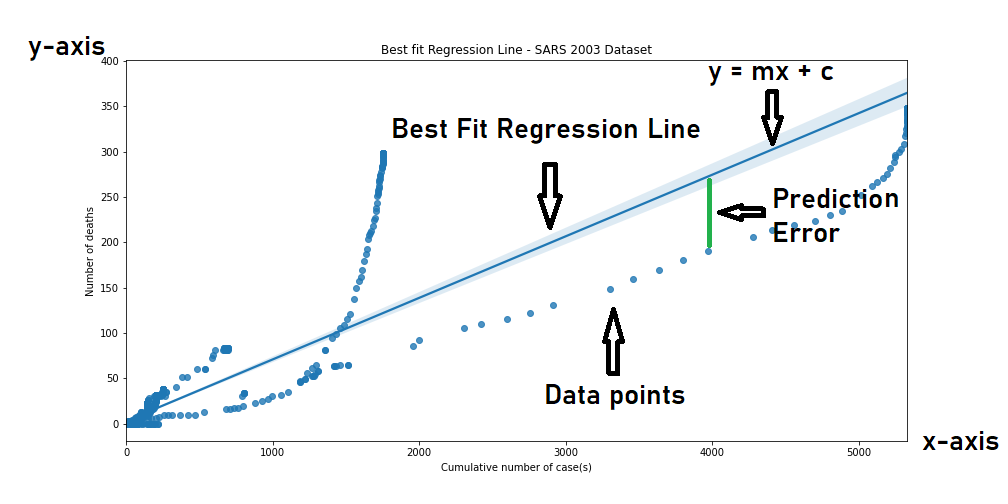


### Evaluation metrics:

1. Mean Absolute Error (MAE):
The distance between any data point and the best fit line is called as prediction error. The absolute mean of it is called as Mean Absolute Error (MAE).

Value range: 0 to ∞
Best value = 0.0 or we can also say that lower the value, better it is.

Formula of it is:
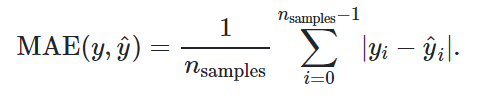

2. Mean Squared Error (MSE):

The summation of suqare of all the distances between any data point and the best fit line divided by the total number of data points (mean) gives us a value called as Mean Squared Error.

Formula of it is:
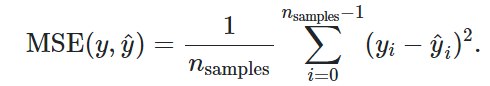

Value range: 0 to ∞
Best value = 0.0 or we can also say that lower the value, better it is.

3. Root Mean Squared Error (RMSE):
For calculating RMSE, we do square root of MSE. 

Value range: 0 to ∞
Best value = 0.0 or we can also say that lower the value, better it is.

Formula of it is:
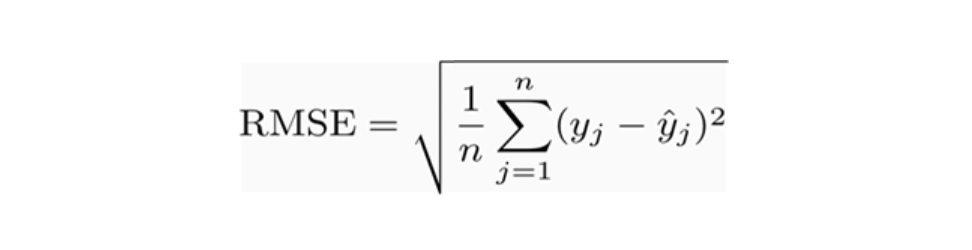

If MAE or MSE or RMSE value is 0 then it means that all the data points are on the best fit line. Higher the value means that the data points are away from the best fit line.

4. R2 Score - Coefficient of Determination: 

R2 Score is defined as regression sum of squares divided by the total sum of squares.

Let's see the formula and then we will find all the parameters needed to calculate the value of R-square:

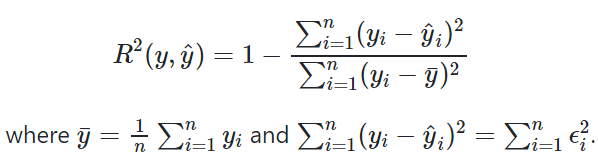

OR 

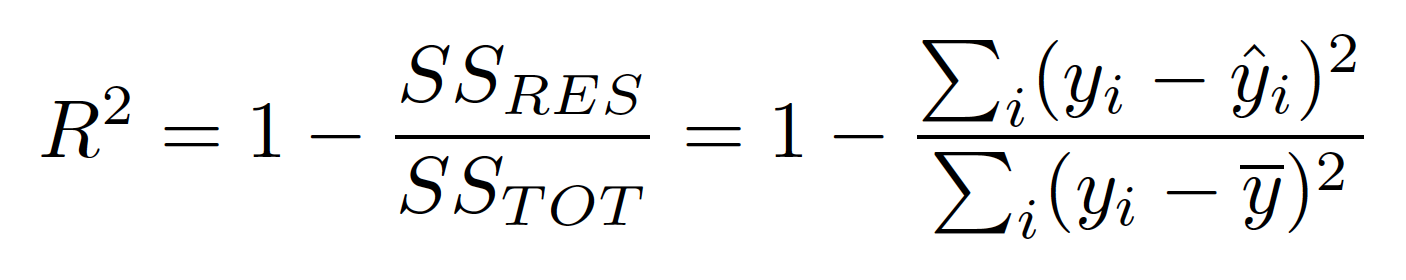

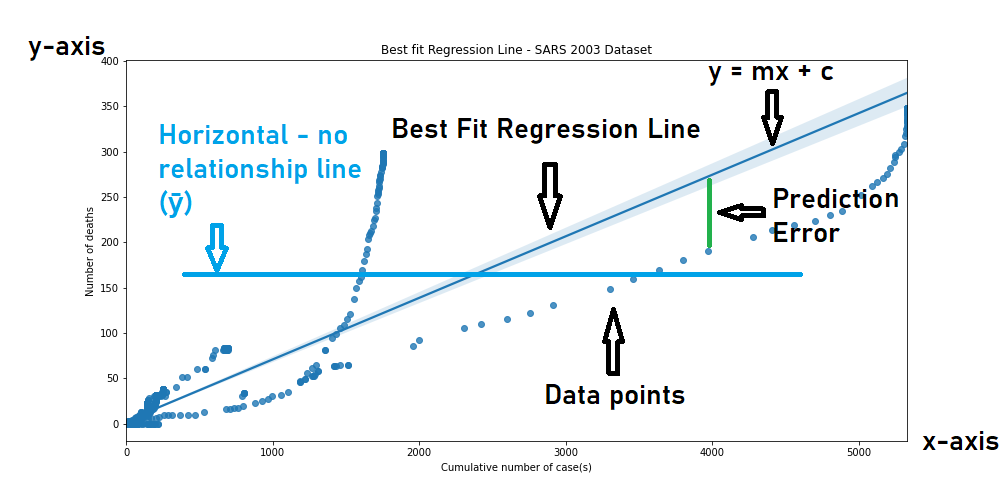

Consider the above example with one new line - horizontal added. So, now we can describe the formula components as - 

a) SS (Res) = Regression sum of squares and it quantifies how far is the regression slope is from the horizontal (no relationship line) the sample mean or y¯.

b) SS (Tot) = Regression total sum of squares and it quantifies how much the data points, yi, vary around their mean, y¯.

### Hands-on coded solutiion

Here, for implementing Linear Regression, training the data and evaluating it we will be using the SARS 2003 dataset. 

Read more about SARS here - [wiki](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome).
The following is code it.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Data Visualization libraries import
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Code for importing files and libraries
import os
output_path = os.path.abspath('/kaggle/output')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv


In [2]:
#Read the file from the directory
df = pd.read_csv("/kaggle/input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv")

In [3]:
#Understanding the dataset in detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
Date                            2538 non-null object
Country                         2538 non-null object
Cumulative number of case(s)    2538 non-null int64
Number of deaths                2538 non-null int64
Number recovered                2538 non-null int64
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


In [4]:
#Changing the names of the columns
df= df.rename(columns={'Cumulative number of case(s)': 'Cumulative_Cases', 'Number of deaths': 'Death_Count', 
                      'Number recovered': 'Recovered_Count'})

### EDA

Total number of rows in 2538 where country wise data is given. 
Total number of cases, deaths and recovered cases are given in the integer data type.
Date and Country features are of object type. So, Date feature will be converted into datetime first and then to numeric value.
Also, Country feature is to be converted to numeric value using Encoding technoques.

In [5]:
#Converting Date feature first to the datetime feature
df.Date = df.Date.apply(pd.to_datetime)

### Graphical understanding

Graph 1:
If we plot a scatterplot of Cumulative cases against Deaths we can see that as the number of cases started increasing the death count also started increasing.

Text(0, 0.5, 'Deaths occured')

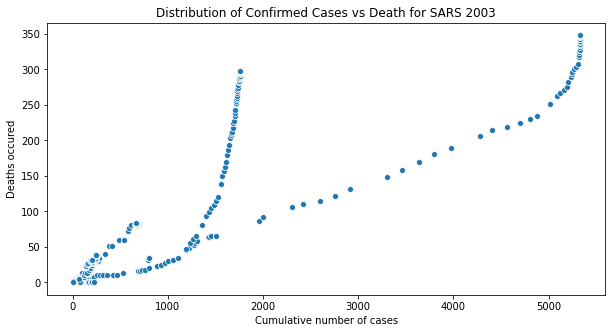

In [6]:
plt.figure(figsize = [10,5])
plt.title('Distribution of Confirmed Cases vs Death for SARS 2003')

sns.scatterplot(x = df['Cumulative_Cases'], y=df['Death_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

Graph 2:
Viewing the above graph with and evaluating the Recovered Feature, we can say that the number of recovered cases started increasing when the cumulative cases started increasing. We can also say that as the medical team took time to understand the disease and then in few weeks time they were able to recover many people from the disease.

Text(0, 0.5, 'Deaths occured')

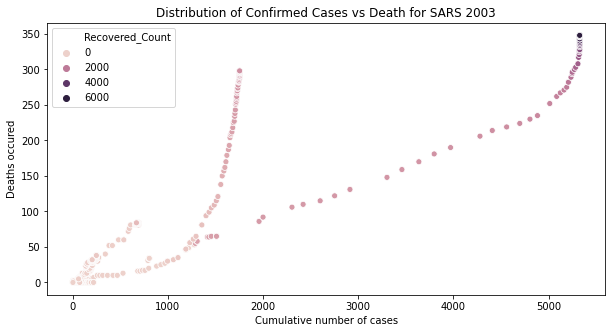

In [7]:
plt.figure(figsize = [10,5])
plt.title('Distribution of Confirmed Cases vs Death for SARS 2003')

sns.scatterplot(x = df['Cumulative_Cases'], y=df['Death_Count'], hue = df['Recovered_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

Graph 3: So,now we will plot the Regression Line for the above scatter plot.

Text(0, 0.5, 'Deaths occured')

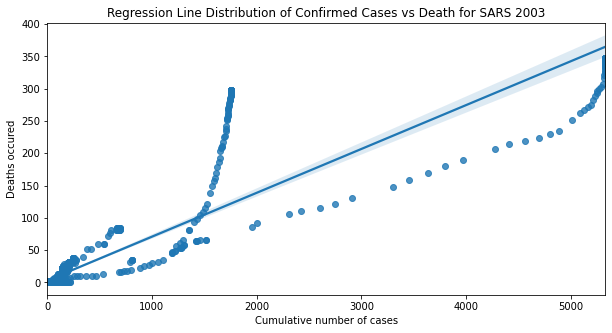

In [8]:
plt.figure(figsize = [10,5])
plt.title('Regression Line Distribution of Confirmed Cases vs Death for SARS 2003')

sns.regplot(x = df['Cumulative_Cases'], y=df['Death_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

### Feature Engineering

In [9]:
# Performing feature engineering and extracting details from Date feature. 
# Since the entire dataset is of year 2003, so we are not considering year. 
# Only, we are extracting month and date values.
# It is important to convert the new feature into type int 

df['Day_of_the_year'] = df.Date.dt.strftime("%d").astype(int)
df['Week_of_the_year'] = df.Date.dt.strftime("%w").astype(int)
df['Month_of_the_year'] = df.Date.dt.strftime("%m").astype(int)
df.drop(['Date'], inplace = True, axis = 1)

### Label Encoding

Here, we will first find out all the features that are not of type numeric. Then, using Label Encoding class by sklearn we will convert the feature type to numeric. 

Reason: To train a machine learning models we need all the data in numbers format (integer or float). Models don't understand text or any other data. We can use Label Encoding or One Hot Encoding for this.

In [10]:
obj_type_features = df.select_dtypes(include = "object").columns
print (obj_type_features)
print (df.Country) #Before Encoding

Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object


In [11]:
# We only have one feature - Country. So, now let's use Label Encoding.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Now we will transform the data of feature Country
df.Country = le.fit_transform(df.Country)

#Now print and check Country feature values after encoding
print (df.Country)

0        9
1        4
2       26
3       10
4       31
        ..
2533    31
2534    33
2535    34
2536    35
2537    36
Name: Country, Length: 2538, dtype: int64


We can see that all the values are transformed into numeric values.

Now, since there are no null values, all feature engineering is done, all object types are converted to the numeric type, we are good to start training out Linear Regression model.

But, before thath we need to divide the dataset into 2 parts: train and test dataset.
If we have 2 different dataset given in the problem statement then we may not split the data as mentioned above. 

In [12]:
from sklearn.model_selection import train_test_split

#Let us assume that we are predicting 
X = df.drop(['Death_Count'], axis = 1)
y = df['Death_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Training



In [13]:
#import the model class from sklearn 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

### Evaluation code

Here, as described in the introduction we will calculate following metrics of evaluation for test data and see how well is our model performing.
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. Coefficient of determination (R2 score)

In [14]:
from sklearn import metrics

print ("Mean Absolute Error (MAE) - Test data : ", metrics.mean_absolute_error(y_test, y_pred))

print ("Mean Squared Error (MSE) - Test data : ", metrics.mean_squared_error(y_test, y_pred))

print ("Root Mean Squared Error (RMSE) - Test data : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Co-efficient of determination (R2 Score): ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE) - Test data :  9.929501662116406
Mean Squared Error (MSE) - Test data :  767.3004229796272
Root Mean Squared Error (RMSE) - Test data :  27.700188139787556
Co-efficient of determination (R2 Score):  0.806576560956122


If you have liked this explanation then please upvote for it. Also, if you want me to make such explanation notebooks for any other model of your choice then comment it below.